# Final Project - Introduction to Data Science - 21KHDL1

## VNU HCM - University of Science
---
## Group ID: 2
## Member

|Name|Student ID|
|---|---|
|Doãn Anh Khoa|21127076|
|Nguyễn Phát Đạt|21127240|
|Nguyễn Bảo Tuấn|21127560|
|Nguyễn Đức Tuấn Đạt|21127590|

## 1. Overview
---

<center>
    <img src="https://i1-english.vnecdn.net/2021/03/12/129896947493263073347366270064-5039-6360-1615543304.jpg?w=680&h=408&q=100&dpr=1&fit=crop&s=lCZHHkjtdU0NdIsXt2tmUg"/>
</center>

### Analyzing Air Pollution in Vietnam

This project focuses on evaluating and addressing _air pollution_ in Vietnam through a data science process. Getting a grip on air pollution in Vietnam is crucial. It helps us make smart decisions, take focused actions, and come up with sustainable solutions to protect public health and the environment in the midst of increasing environmental issues.

Beginning with data collection, followed by preprocessing and exploratory analysis, the goal is to extract insights from the data. The project concludes by developing predictive models that encompass regression, classification, or clustering, offering useful solutions to address air pollution challenges in Vietnam.

### About data
The data is mainly collected from the __Air Pollution API__ from this website: [OpenWeather](https://openweathermap.org/api/air-pollution) provides current, forecast and historical air pollution data for any coordinates on the globe (note that we will focus on Vietnam only). 

And some additional features about _demographic_, _population_, _HDI_, _Development_... in Vietnam came from this website: [GIS on Population and Development](https://gis.gso.gov.vn/?fbclid=IwAR0S7fuNo9J-p-iMRWeXGsVHoJSmRMMr5MF4KYzV5PqdwODuWpt9T_JgoGg).

### 1.1. Import neccessary libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from unidecode import unidecode
import geopandas as gpd
import plotly.express as px
import datetime

%matplotlib inline

## 2. Data collection
---

Since this step may take time to complete (about 4-5 mins), after collecting all the necessary data from different sources ([OpenWeather API](https://openweathermap.org/api/air-pollution) and [GIS on Population and Development](https://gis.gso.gov.vn/?fbclid=IwAR0S7fuNo9J-p-iMRWeXGsVHoJSmRMMr5MF4KYzV5PqdwODuWpt9T_JgoGg)), we will store those data to several files.

Therefore, in this notebook, we only need to read those collected data from the files in the folder `/data`.

View `src/DataCollection.ipynb` for more details about data collection step.

## 3. Data preprocessing & Exploration
---

### 3.1. Data preprocessing

Let's read the raw data from the first source: [OpenWeather API](https://openweathermap.org/api/air-pollution) about air substances and air quality of many places in Vietnam that we've just collected.

In [38]:
if os.path.isfile('../data/air_raw.csv'):
    df = pd.read_csv('../data/air_raw.csv')
    display(df)
else:
    raise Exception('Data is not available! Please collect data again using the file DataCollection.ipynb')

,location,dt,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi
0,An Giang,1609459200,507.36,0.00,6.34,65.80,5.42,15.00,19.00,6.27,2
1,An Giang,1609545600,400.54,0.02,5.66,60.08,4.83,14.48,18.26,6.08,2
2,An Giang,1609632000,500.68,0.01,7.97,42.20,3.82,19.29,23.05,8.04,2
3,An Giang,1609718400,654.22,0.06,12.51,24.68,4.35,23.56,29.31,9.63,3
4,An Giang,1609804800,714.30,0.04,14.22,18.95,4.23,22.98,25.93,4.88,3
...,...,...,...,...,...,...,...,...,...,...,...
45859,Yen Bai,1672099200,714.30,0.00,13.19,55.07,12.52,138.08,156.96,0.94,5
45860,Yen Bai,1672185600,607.49,0.00,3.60,72.24,11.80,124.45,126.85,0.66,5
45861,Yen Bai,1672272000,487.33,0.00,3.60,41.13,2.44,26.11,27.11,1.44,3
45862,Yen Bai,1672358400,407.22,0.00,1.97,48.64,1.64,18.41,19.14,1.41,2


First, we can see that the data of the `dt` column are being saved in the unix time format, makes it harder for us to understand it. Therefore, let's change that to the datetime format using the `pandas.to_datetime()` method.

Moreover, since we've skipped over hour time points to get data from each day passed, the exact time of the day (hour, minute, second) is unecessary. Therefore, we will convert it to date format only (year-month-day) using the `.date` attribute.

After converting the data to date format, it's easier for us to manipulate the data on the `date` column.

In [39]:
date_series = pd.to_datetime(df['dt'], unit='s').dt.date # convert
df.insert(loc=1, column='date', value=date_series) # add column to the df
df['date'] = pd.to_datetime(df['date']) # convert to datetime
df.drop(columns='dt', inplace=True) # drop the timestamp format column
df

,location,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi
0,An Giang,2021-01-01,507.36,0.00,6.34,65.80,5.42,15.00,19.00,6.27,2
1,An Giang,2021-01-02,400.54,0.02,5.66,60.08,4.83,14.48,18.26,6.08,2
2,An Giang,2021-01-03,500.68,0.01,7.97,42.20,3.82,19.29,23.05,8.04,2
3,An Giang,2021-01-04,654.22,0.06,12.51,24.68,4.35,23.56,29.31,9.63,3
4,An Giang,2021-01-05,714.30,0.04,14.22,18.95,4.23,22.98,25.93,4.88,3
...,...,...,...,...,...,...,...,...,...,...,...
45859,Yen Bai,2022-12-27,714.30,0.00,13.19,55.07,12.52,138.08,156.96,0.94,5
45860,Yen Bai,2022-12-28,607.49,0.00,3.60,72.24,11.80,124.45,126.85,0.66,5
45861,Yen Bai,2022-12-29,487.33,0.00,3.60,41.13,2.44,26.11,27.11,1.44,3
45862,Yen Bai,2022-12-30,407.22,0.00,1.97,48.64,1.64,18.41,19.14,1.41,2


Looks like the data from the the first source are good now, let's have a look at the data from the [GIS on Population and Development](https://gis.gso.gov.vn/?fbclid=IwAR0S7fuNo9J-p-iMRWeXGsVHoJSmRMMr5MF4KYzV5PqdwODuWpt9T_JgoGg) website. Note that these data will be stored separately for each year with each contains some information about _population and development_ for each province/city in Vietnam.

In [40]:
if os.path.isfile('../data/new_features_year1.csv') and os.path.isfile('../data/new_features_year2.csv'):
    first_year = pd.read_csv('../data/new_features_year1.csv', index_col=0)
    second_year = pd.read_csv('../data/new_features_year2.csv', index_col=0)
    print("First year:")
    display(first_year)
    print("Second year:")
    display(second_year)
else:
    raise Exception('Data is not available! Please collect data again using the file DataCollection.ipynb')

First year:


,Total population in urban,Total population in rural,HDI,Percentage of poor households
Ha Noi,4095366.0,4235468.0,0.81,0.4
Ha Giang,140327.0,746759.0,0.59,25.0
Cao Bang,138178.0,404039.0,0.65,24.5
Bac Kan,73114.0,250598.0,0.68,20.6
Tuyen Quang,NaN,NaN,NaN,NaN
...,...,...,...,...
Can Tho,876923.0,370070.0,0.72,1.8
Hau Giang,212686.0,517202.0,0.69,5.2
Soc Trang,391396.0,815423.0,0.65,4.7
Bac Lieu,254940.0,663570.0,0.66,5.8


Second year:


,Total population in urban,Total population in rural,HDI,Percentage of poor households
Ha Noi,4138505.0,4297147.0,0.82,0.1
Ha Giang,142345.0,750378.0,0.60,31.6
Cao Bang,138465.0,404587.0,0.66,23.6
Bac Kan,73565.0,250788.0,0.69,20.1
Tuyen Quang,NaN,NaN,NaN,NaN
...,...,...,...,...
Can Tho,882856.0,369492.0,0.74,1.0
Hau Giang,204991.0,524476.0,0.69,5.3
Soc Trang,405650.0,792173.0,0.67,6.1
Bac Lieu,255891.0,665918.0,0.67,5.2


Looks like both of them are good now, let's __merge__ the data from the OpenWeather API with the data that we've just scraped from the GIS website.

In [41]:
# join all data to a single dataframe
first_year = df[df['date'].dt.year == 2021].merge(first_year.reset_index(), left_on='location', right_on='index').drop('index', axis=1)
second_year = df[df['date'].dt.year == 2022].merge(second_year.reset_index(), left_on='location', right_on='index').drop('index', axis=1)
df = pd.concat([first_year, second_year])
df = df.sort_values(by=['location', 'date']).reset_index(drop=True)
df

,location,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Total population in urban,Total population in rural,HDI,Percentage of poor households
0,An Giang,2021-01-01,507.36,0.00,6.34,65.80,5.42,15.00,19.00,6.27,2,646021.0,1263485.0,0.66,3.5
1,An Giang,2021-01-02,400.54,0.02,5.66,60.08,4.83,14.48,18.26,6.08,2,646021.0,1263485.0,0.66,3.5
2,An Giang,2021-01-03,500.68,0.01,7.97,42.20,3.82,19.29,23.05,8.04,2,646021.0,1263485.0,0.66,3.5
3,An Giang,2021-01-04,654.22,0.06,12.51,24.68,4.35,23.56,29.31,9.63,3,646021.0,1263485.0,0.66,3.5
4,An Giang,2021-01-05,714.30,0.04,14.22,18.95,4.23,22.98,25.93,4.88,3,646021.0,1263485.0,0.66,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45859,Yen Bai,2022-12-27,714.30,0.00,13.19,55.07,12.52,138.08,156.96,0.94,5,176649.0,670596.0,0.66,16.6
45860,Yen Bai,2022-12-28,607.49,0.00,3.60,72.24,11.80,124.45,126.85,0.66,5,176649.0,670596.0,0.66,16.6
45861,Yen Bai,2022-12-29,487.33,0.00,3.60,41.13,2.44,26.11,27.11,1.44,3,176649.0,670596.0,0.66,16.6
45862,Yen Bai,2022-12-30,407.22,0.00,1.97,48.64,1.64,18.41,19.14,1.41,2,176649.0,670596.0,0.66,16.6


Now, we should verify whether there are any missing values or inconsistencies in the data types within each column.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45864 entries, 0 to 45863
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   location                       45864 non-null  object        
 1   date                           45864 non-null  datetime64[ns]
 2   co                             45864 non-null  float64       
 3   no                             45864 non-null  float64       
 4   no2                            45864 non-null  float64       
 5   o3                             45864 non-null  float64       
 6   so2                            45864 non-null  float64       
 7   pm2_5                          45864 non-null  float64       
 8   pm10                           45864 non-null  float64       
 9   nh3                            45864 non-null  float64       
 10  aqi                            45864 non-null  int64         
 11  Total populatio

Look likes there are missing values in our data for the additional features (from the __GIS website__). This may be due to the fact that the data from some cities/provinces are missing. 

Let's see which and how many locations are missing. 

In [43]:
np.unique(df[df.isnull().any(axis=1)]['location'])

array(['Tuyen Quang'], dtype=object)

Although there is only 1 location (`Tuyen Quang`) that have missing values, we still shouldn't remove this from our data since removing this means we also have to remove all the records (about 730 records in 2 years) from the air pollution data.

Therefore, instead of removing records with missing values, we will fill these missing values with the mean of the column that values are in. Because the number of missing values in our data is not significant and this can be a simple way to maintain the overall central tendency of the variable.

In [44]:
numeric_columns = df.select_dtypes(include='number').columns
print (numeric_columns)
mean_values_numeric = df[numeric_columns].mean()
print (mean_values_numeric)
df[numeric_columns] = df[numeric_columns].fillna(mean_values_numeric)

display(df[df['location'] == 'Tuyen Quang'])

Index(['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'aqi',
       'Total population in urban', 'Total population in rural', 'HDI',
       'Percentage of poor households'],
      dtype='object')
co                                  719.597367
no                                    3.313313
no2                                  10.921895
o3                                   23.843526
so2                                   5.957356
pm2_5                                43.697623
pm10                                 50.570178
nh3                                   5.597484
aqi                                   3.115297
Total population in urban        594203.343141
Total population in rural        989429.788617
HDI                                   0.708209
Percentage of poor households         6.875780
dtype: float64


,location,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Total population in urban,Total population in rural,HDI,Percentage of poor households
42952,Tuyen Quang,2021-01-01,494.00,0.00,7.80,58.65,4.29,38.48,45.54,7.03,4,594203.343141,989429.788617,0.708209,6.87578
42953,Tuyen Quang,2021-01-02,894.55,0.37,16.79,9.30,2.89,82.09,95.51,13.93,5,594203.343141,989429.788617,0.708209,6.87578
42954,Tuyen Quang,2021-01-03,854.49,0.43,12.85,7.87,2.18,149.88,166.12,7.22,5,594203.343141,989429.788617,0.708209,6.87578
42955,Tuyen Quang,2021-01-04,807.76,0.79,12.17,5.41,1.97,126.17,140.47,4.56,5,594203.343141,989429.788617,0.708209,6.87578
42956,Tuyen Quang,2021-01-05,947.95,2.60,12.34,0.96,2.77,147.21,166.90,8.87,5,594203.343141,989429.788617,0.708209,6.87578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43675,Tuyen Quang,2022-12-27,607.49,0.00,13.37,50.07,10.13,110.09,127.26,4.56,5,594203.343141,989429.788617,0.708209,6.87578
43676,Tuyen Quang,2022-12-28,507.35,0.00,3.34,69.38,10.37,103.69,105.45,0.76,5,594203.343141,989429.788617,0.708209,6.87578
43677,Tuyen Quang,2022-12-29,540.73,0.01,8.48,38.27,4.29,25.19,28.80,8.23,3,594203.343141,989429.788617,0.708209,6.87578
43678,Tuyen Quang,2022-12-30,440.60,0.00,3.86,33.62,1.76,18.64,20.36,2.06,2,594203.343141,989429.788617,0.708209,6.87578


We've completed the initial merging of data from two distinct sources. Nevertheless, it's important to note that data obtained from the __OpenWeather API__ we got are recorded daily, whereas the data from the __GIS website__ are recorded annually leading to every row of the merged data for the same location are all equivalent to each other in the additional features. 

To extend this data to a daily format, we'll need a method to populate each hourly record with the relevant features from the __GIS website__ as time progresses.

Taking into account these additional features, we recognize that these data reflects population and development which typically evolve gradually over time. As a result, we propose filling in the missing data for each day by using the accumulated value of (next year - previous year) / (number of days in that year). 

In [45]:
# Define the function to apply within each group
def equal_steps_replace(group):
    min_value = group.iloc[0]
    max_value = group.iloc[-1]
    num_steps =  len(group)
    new_values = np.linspace(min_value, max_value, num_steps)
    return new_values

for feature in ['Total population in urban', 'Total population in rural', 'HDI']:
    df[feature] = df.groupby('location')[feature].transform(equal_steps_replace)

df

,location,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Total population in urban,Total population in rural,HDI,Percentage of poor households
0,An Giang,2021-01-01,507.36,0.00,6.34,65.80,5.42,15.00,19.00,6.27,2,646021.000000,1.263485e+06,0.660000,3.5
1,An Giang,2021-01-02,400.54,0.02,5.66,60.08,4.83,14.48,18.26,6.08,2,646019.283356,1.263481e+06,0.660000,3.5
2,An Giang,2021-01-03,500.68,0.01,7.97,42.20,3.82,19.29,23.05,8.04,2,646017.566713,1.263477e+06,0.660000,3.5
3,An Giang,2021-01-04,654.22,0.06,12.51,24.68,4.35,23.56,29.31,9.63,3,646015.850069,1.263474e+06,0.660000,3.5
4,An Giang,2021-01-05,714.30,0.04,14.22,18.95,4.23,22.98,25.93,4.88,3,646014.133425,1.263470e+06,0.660000,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45859,Yen Bai,2022-12-27,714.30,0.00,13.19,55.07,12.52,138.08,156.96,0.94,5,176638.436039,6.705814e+05,0.659945,16.6
45860,Yen Bai,2022-12-28,607.49,0.00,3.60,72.24,11.80,124.45,126.85,0.66,5,176641.077029,6.705850e+05,0.659959,16.6
45861,Yen Bai,2022-12-29,487.33,0.00,3.60,41.13,2.44,26.11,27.11,1.44,3,176643.718019,6.705887e+05,0.659972,16.6
45862,Yen Bai,2022-12-30,407.22,0.00,1.97,48.64,1.64,18.41,19.14,1.41,2,176646.359010,6.705923e+05,0.659986,16.6


In [72]:
display(df[df['location'] == 'An Giang'])

,location,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Total population in urban,Total population in rural,HDI,Percentage of poor households
0,An Giang,2021-01-01,507.36,0.00,6.34,65.80,5.42,15.00,19.00,6.27,2,646021,1263485,0.66,3.5
1,An Giang,2021-01-02,400.54,0.02,5.66,60.08,4.83,14.48,18.26,6.08,2,646019,1263481,0.66,3.5
2,An Giang,2021-01-03,500.68,0.01,7.97,42.20,3.82,19.29,23.05,8.04,2,646017,1263477,0.66,3.5
3,An Giang,2021-01-04,654.22,0.06,12.51,24.68,4.35,23.56,29.31,9.63,3,646015,1263473,0.66,3.5
4,An Giang,2021-01-05,714.30,0.04,14.22,18.95,4.23,22.98,25.93,4.88,3,646014,1263469,0.66,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,An Giang,2022-12-27,1508.71,3.55,25.70,1.83,4.71,69.94,89.36,13.55,4,644779,1260758,0.66,4.6
724,An Giang,2022-12-28,2269.74,23.47,9.85,0.07,4.59,137.89,156.84,18.49,5,644778,1260754,0.66,4.6
725,An Giang,2022-12-29,1842.50,8.49,22.62,0.91,5.42,80.67,105.81,15.33,5,644776,1260750,0.66,4.6
726,An Giang,2022-12-30,574.11,0.05,11.14,28.25,4.05,18.75,23.20,9.88,2,644774,1260746,0.66,4.6


Save the processed data to the `air_pollution.csv` file.

In [46]:
df.to_csv("../data/air_pollution.csv", encoding='utf-8', index=False)

### 3.2. Data exploration

#### 3.2.1. How many rows and columns are there in your data?

In [47]:
df.shape

(45864, 15)

Let's double-check the number of rows again by calculating how many rows of our data supposed to have.. During data collection, we aimed to gather all records for each day over two consecutive years (2021 and 2022) across 63 provinces/cities in Vietnam. Consequently, the expected total should be $365 \times 2 \times 63 = 45,990$ records.

However, our dataset currently contains only $45,864$ rows. This indicates that there are some missing records (exactly two days for each location: $45,990 - 45,864 = 126 = 63 \times 2$) in the OpenWeather API, but these gaps are not very significant, we will overlook them for now.

#### 3.2.2. What is the meaning of each row/column?

In [48]:
# print out some samples to get a quick insight about the dataset
df.sample(5)

,location,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Total population in urban,Total population in rural,HDI,Percentage of poor households
23041,Kien Giang,2022-04-19,500.68,0.35,6.08,35.76,1.36,16.89,28.25,4.88,2,5.163122e+05,1.235642e+06,0.676506,4.1
3922,Bac Ninh,2021-10-10,417.23,0.03,8.31,24.68,3.79,11.23,13.65,3.10,2,5.432960e+05,9.294647e+05,0.773879,0.6
4800,Ben Tre,2022-03-09,447.27,0.03,3.56,91.55,2.06,21.77,34.64,2.82,3,1.311094e+05,1.165963e+06,0.675942,3.9
34033,Quang Ngai,2022-06-30,807.76,3.07,13.02,10.82,4.17,33.85,41.30,13.05,4,2.698272e+05,9.754418e+05,0.717497,6.6
40234,Thanh Hoa,2021-07-14,540.73,0.32,6.43,27.90,4.95,14.10,19.11,4.75,2,1.003131e+06,2.714799e+06,0.715337,6.3


__Meaning of each row/column:__

- The meaning of each row: each row indicates air pollution level information and other pieces of information about popuplation, economy, and human development in a certain province/city on a certain date. It seems not to be any different meaningful row.

| Column                           | Description                                                                                                                             |
|----------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------|
| `location`                       | Name of province/city.                                                                                                                 |
| `date`                           | Specific time in the format __year-month-day__, providing information for each province/city.                                          |
| `co`, `no`, `no2`, `o3`, `so2`,   | Concentrations of polluting gases: Carbon monoxide ($CO$), Nitrogen monoxide ($NO$), Nitrogen dioxide ($NO_2$), Ozone ($O_3$),           |
| `pm2_5`, `pm10`, `nh3`            | Sulphur dioxide ($SO_2$), Ammonia ($NH_3$), and particulates ($PM_{2.5}$ and $PM_{10}$). Units: $μg/{m^3}$.                               |
| `aqi`                            | Air Quality Index, representing air pollution severity for the general public, ranging from $1$ to $5$ (Good, Fair, Moderate, Poor, Very Poor).|
| `Total population in urban`      | Total urban population in each province/city.                                                                                           |
| `Total population in rural`      | Total rural population in each province/city.                                                                                           |
| `HDI`                            | Human Development Index, a comparative, quantitative index of Income, Education, and Life Expectancy in provinces/cities in Vietnam.      |
| `Percentage of poor households`  | Proportion or percentage of poor households within a given population in a specific area.                                               |


#### Does the data have duplicate rows?

In [49]:
df.duplicated().sum()

0

The data do not seem to have duplicate rows as expected because every row indicates information of a distinct area on a specific date.

#### 3.2.3. What is the datatype of each column? Is there any column having inapproriate datatype?

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45864 entries, 0 to 45863
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   location                       45864 non-null  object        
 1   date                           45864 non-null  datetime64[ns]
 2   co                             45864 non-null  float64       
 3   no                             45864 non-null  float64       
 4   no2                            45864 non-null  float64       
 5   o3                             45864 non-null  float64       
 6   so2                            45864 non-null  float64       
 7   pm2_5                          45864 non-null  float64       
 8   pm10                           45864 non-null  float64       
 9   nh3                            45864 non-null  float64       
 10  aqi                            45864 non-null  int64         
 11  Total populatio

Certain columns, such as `Total population in urban` and `Total population in rural` are expected to contain natural numbers. It doesn't make sense for these columns to have a floating-point data type (because of the mean values), so we should convert them to integer data type.

In [51]:
int_col = ['Total population in urban', 'Total population in rural']
df[int_col] = df[int_col].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45864 entries, 0 to 45863
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   location                       45864 non-null  object        
 1   date                           45864 non-null  datetime64[ns]
 2   co                             45864 non-null  float64       
 3   no                             45864 non-null  float64       
 4   no2                            45864 non-null  float64       
 5   o3                             45864 non-null  float64       
 6   so2                            45864 non-null  float64       
 7   pm2_5                          45864 non-null  float64       
 8   pm10                           45864 non-null  float64       
 9   nh3                            45864 non-null  float64       
 10  aqi                            45864 non-null  int64         
 11  Total populatio

#### 3.2.4. What are some descriptive statistics about this data ? 

In [52]:
df.describe(include=['int64', 'float64'])

,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Total population in urban,Total population in rural,HDI,Percentage of poor households
count,45864.000000,45864.000000,45864.000000,45864.000000,45864.000000,45864.000000,45864.000000,45864.000000,45864.000000,4.586400e+04,4.586400e+04,45864.000000,45864.000000
mean,719.597367,3.313313,10.921895,23.843526,5.957356,43.697623,50.570178,5.597484,3.115297,5.942198e+05,9.894334e+05,0.708226,6.875780
std,606.248444,11.615878,11.927983,23.915290,9.752626,55.080583,60.804466,9.253061,1.541780,1.027688e+06,6.622186e+05,0.048476,7.843926
min,163.560000,0.000000,0.230000,0.000000,0.060000,0.500000,0.540000,0.000000,1.000000,7.311400e+04,1.511590e+05,0.590000,0.000000
25%,376.345000,0.020000,2.660000,5.100000,0.950000,11.110000,14.040000,1.030000,2.000000,2.115540e+05,5.630655e+05,0.679505,1.800000
50%,534.060000,0.120000,6.510000,16.450000,2.530000,24.570000,30.210000,3.010000,3.000000,3.175190e+05,8.078860e+05,0.702600,4.100000
75%,827.790000,1.060000,14.910000,35.410000,6.850000,53.920000,63.240000,6.900000,5.000000,5.407422e+05,1.220533e+06,0.734997,7.900000
max,11535.650000,332.590000,138.460000,180.240000,186.920000,927.460000,979.620000,299.930000,5.000000,7.297847e+06,4.297147e+06,0.820000,34.500000


- It seems like there's nothing too unusual in those values, except for the maximum values (of most columns), which show significant deviations from the rest of the values. 

- Therefore, we would expect that their distribution tends to be right-skewed, with the majority being relatively tightly distributed around a central value (we will examine this more clearly at the next step).

#### 3.2.5. What is the distribution of the data in each column?

For some columns like: `location`, `date`, knowing about their distributions is not very helpful since we know that they will be distributed evenly due to the data collection part. 

Therefore, we will only consider the distributions of remaining numerical columns only.

__Continuous numerical columns__

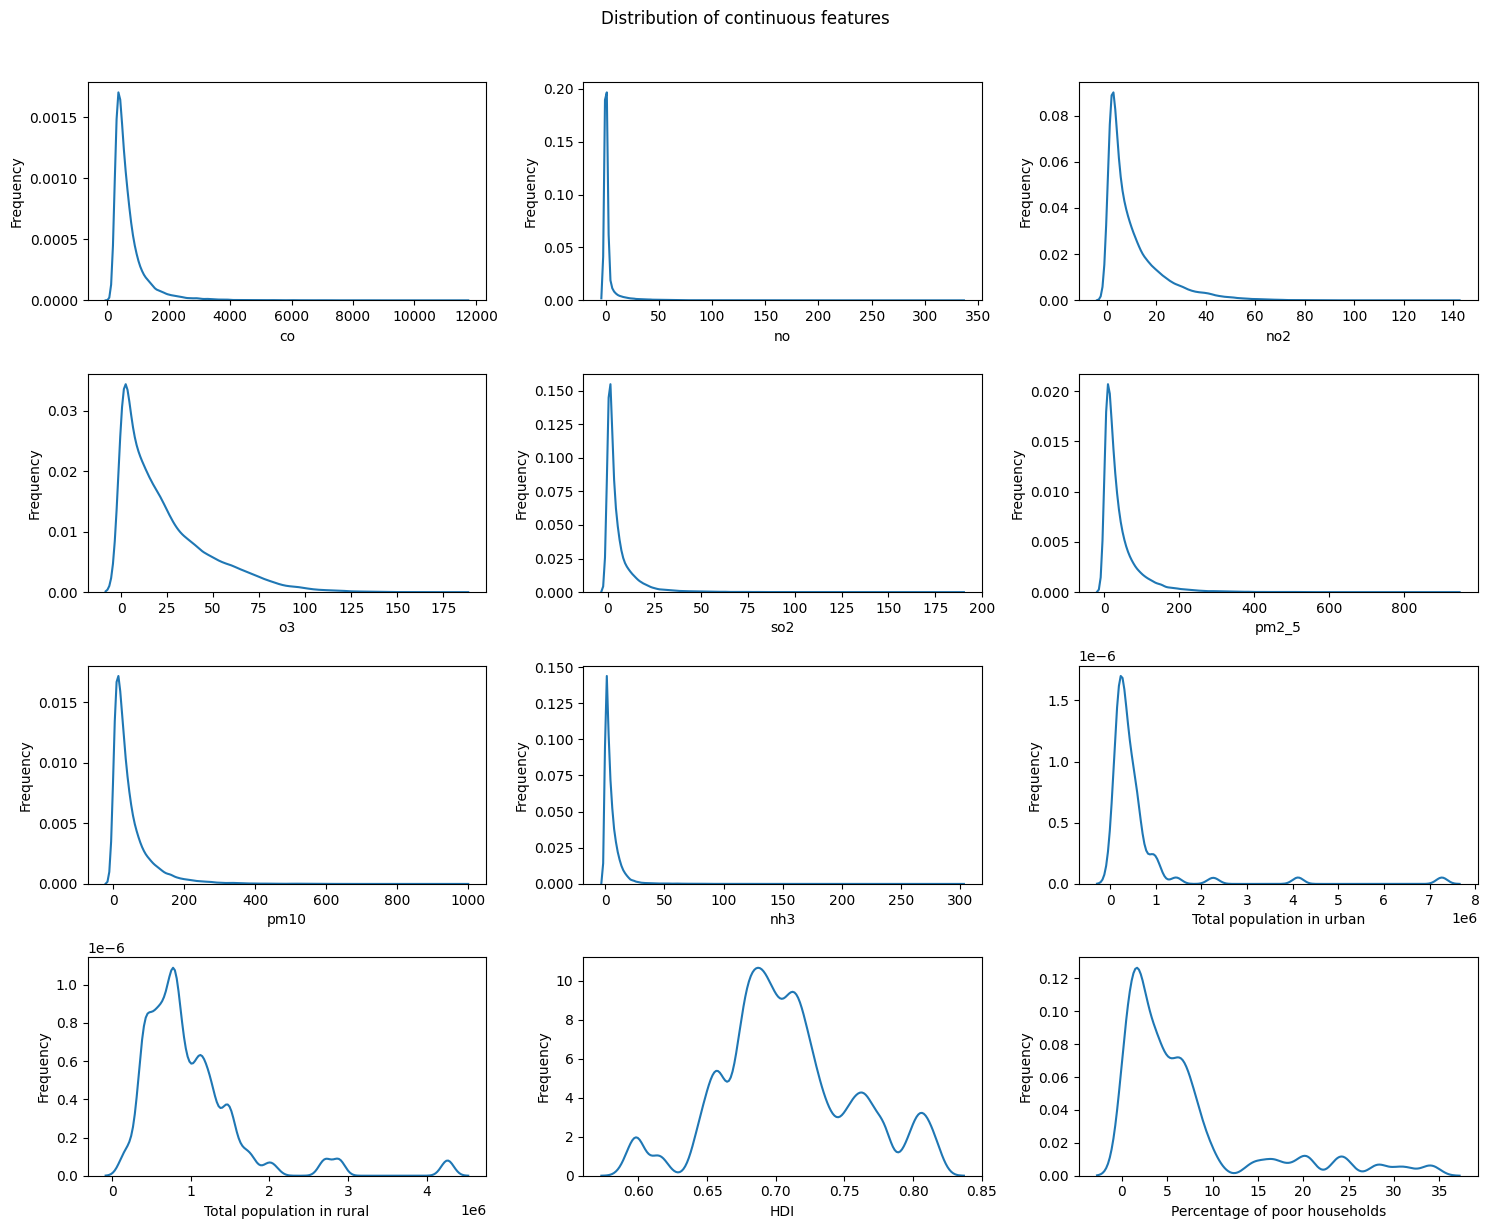

In [53]:
# Select the numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Extract aqi 
numerical_columns = numerical_columns.drop('aqi')

# Set up subplots
n = len(numeric_columns)
num_cols = 3
num_rows = n // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))
# fig.subplots_adjust(hspace=0.45)
fig.suptitle('Distribution of continuous features', y=1.02)

# Plot histograms for numerical columns
for i, column in enumerate(numerical_columns):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]
    
    sns.kdeplot(df[column], ax=ax)
    
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    
fig.tight_layout()

plt.show()

__Comments:__ 

- __Air substances' concentration:__ The distribution of most air substances' concentrations in various locations across Vietnam is noticeable for being _right-skewed_, as observed in the density plot. This indicates that in many instances, the majority of recorded concentrations tend to be lower. This suggests generally good air quality, with lower concentrations being predominant. This skewness may indicate compliance with regulations, effective pollution controls, and positive public health implications.

- __Population and development:__ 
    - The right-skewed distributions across these features collectively indicates that the majority of regions in Vietnam have relatively lower populations, development...

    - Urban centers, especially major cities like Ho Chi Minh City, Hanoi, likely contribute to the higher end of these distributions (we can see there are fluctuations at higher values point).
    - Most regions in Vietnam still exhibit relatively low levels of development, with significant disparities compared to major provinces and cities. This indicates an ongoing situation of __uneven development__ in the country.
    - The goverment should focus on addressing economic and developmental disparities, ensuring more balanced growth and equitable distribution of resources.
    - Notably, the `HDI` feature having a nearly normal distribution is a unique observation. It suggests a more balanced distribution of human development across regions, suggesting that efforts to improve education and human development are rather effective, which is a good thing for us.

__Discrete numerical columns__

There is only one discrete feature (`aqi`) in our data. This feature can also be considered categorical in fact, given its discrete values ranging from 1 to 5. It holds importance, so we intend to conduct a separate analysis for it.

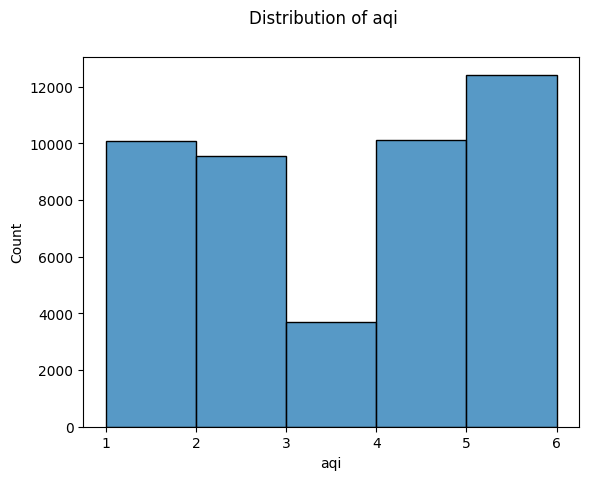

In [54]:
plt.suptitle('Distribution of aqi')
sns.histplot(df['aqi'], bins=range(1, 7))
plt.show()

__Observations:__ 

- __Distribution:__ The air quality across the country exhibits a predominant distribution in two categories: relatively good (5-6) and relatively poor (1-2).

- __Uneven air quality across the country:__ Most places throughout the country are characterized by poorer air quality, indicating a common concern. Despite the prevalent poor air quality, a significant number of places also experience good air quality. The diversity in air quality among locations suggests an uneven distribution of air quality throughout the country.

- __Explaination:__ The observed variations in air quality may be attributed to differing climatic conditions in each location due to Vietnam's extensive geographical diversity. Moreover, climatic conditions, air quality, may undergo changes over time, leading to the variability. The concentration of industrialization in specific areas is also a considerable factor to the observed air quality distribution.

#### 3.2.6. How the features correlate with each other?

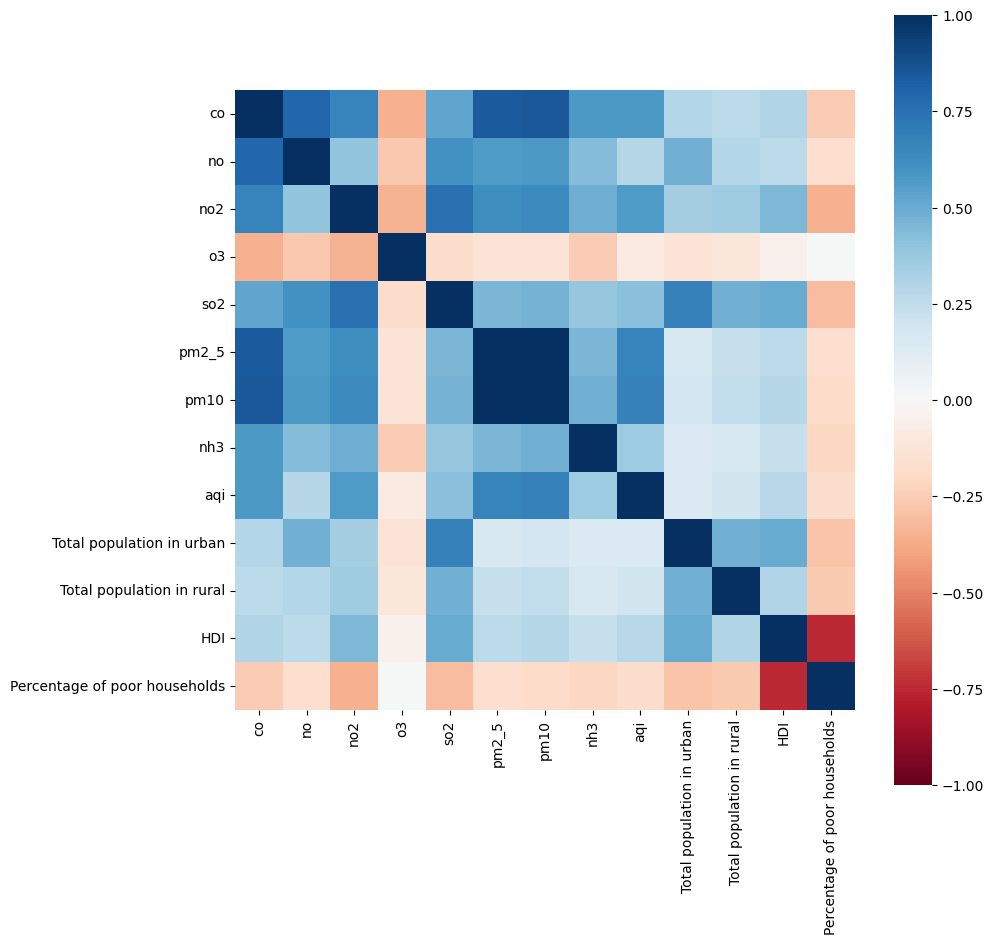

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.drop(inplace=False, columns=['location', 'date']).corr(), annot=False, 
                 vmax=1, vmin=-1,square=True,cmap='RdBu')

__Observations__
- From the above chart, some features which have no correlation between them and the others are $O_{3}$.
- There seem to be no correlation between features related to Population and Development and features related to polluting gases.

- The subject is about to analyzing air pollution, so we will care about and focus on __AQI__ value, stand for __Air Quality Index__,  This value represents the severity of air pollution for ordinary people. From the above heatmap, we observe that the correlation between __AQI__ and other features:
    - Some features have a lot of positive effects on __AQI__. These features which are ascendingly sorted according to the correlation between __AQI__ and them are $PM_{10}$, $PM_{2.5}$, $NO_{2}$, $CO$, and $SO_{2}$.
    - Another feature that has a slightly positive effect on _AQI_ is $NH_{3}$.
    - The other feature that have no affect on __AQI__.
    - When observing the correlation among features related the polluting gases, we firgure out that the correlation between $PM_{10}$ and $PM_{2.5}$ is an almost absolute positive correlation. So we can use one of them to evaluate the level of air pollution. 
    - Besides, we also find out that the correlation coefficients of these features and the other features related to the polluting gases except $O_{3}$ are quite high positive coefficients. This indicates that the values of the features such as $NO_{2}$, $CO$, $SO_{2}$, and $NH_{3}$ increases, the values of the features such as $PM_{10}$ and $PM_{2.5}$ aslo increases. 

**Question 1:** What is the situation about the air quality from all the provinces and cities in Viet Nam?

**Answering this question will:** give us some insights about the areas having the bad or good quality, helping us concentrate on some specific areas to resolve the air pollution. 

**How we answer this question**: we will visualize the average air quality of different locations in Vietnam using a choropleth map.

__Preprocessing__

In [56]:
# Read the map of all provinces
geo = gpd.read_file('../data/vn-projected.json')

# Calculate the average AQI for each province/city
density = df.groupby(['location'])['aqi'].mean().reset_index(name='Avg.AQI')

# Matching the province/ city name
geo['ten_tinh'] = geo['ten_tinh'].apply(lambda x: unidecode(x))
geo = geo.merge(density, left_on='ten_tinh', right_on='location').drop('location', axis=1)

__Visualize__

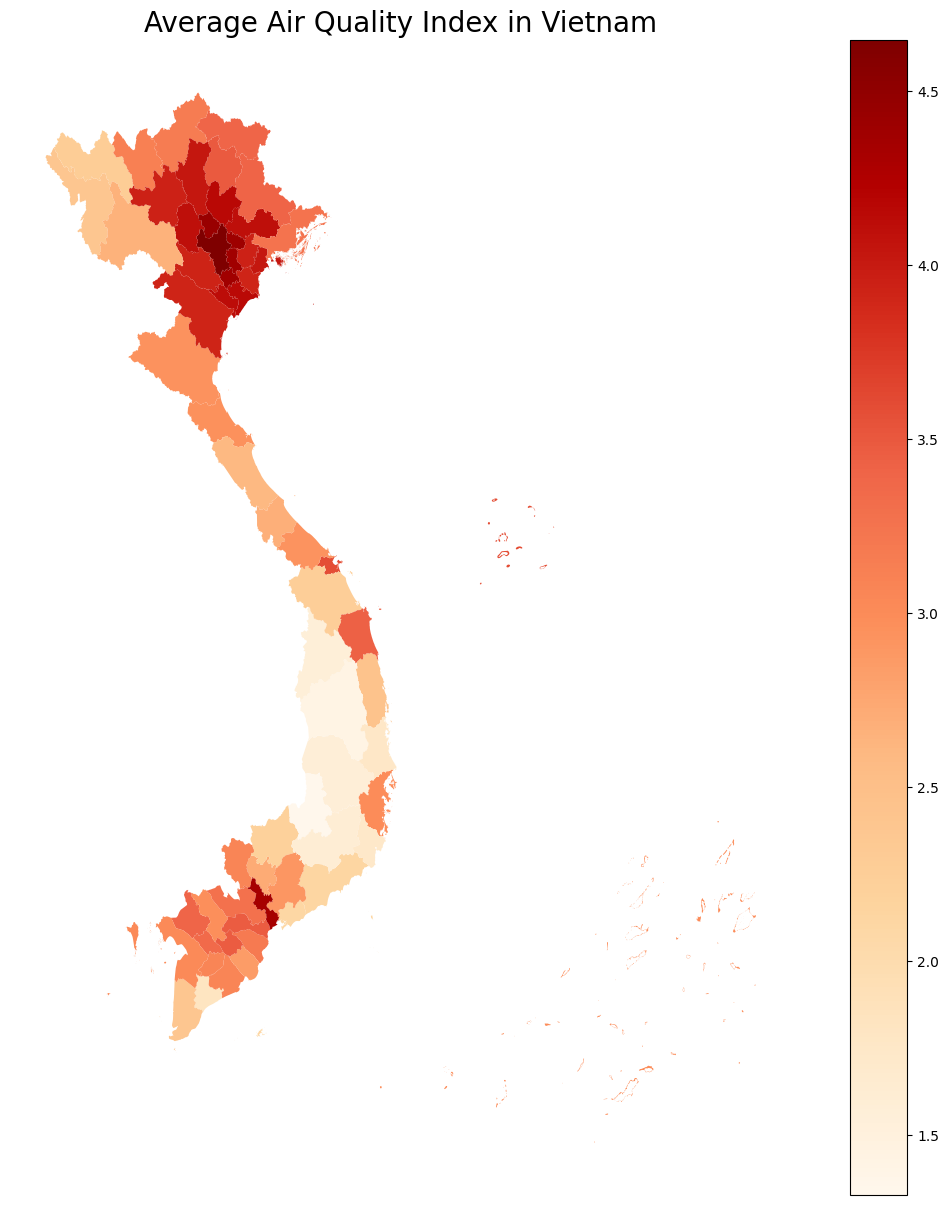

In [57]:
# Set up for heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.invert_yaxis()
plt.axis('off')
ax.set_title('Average Air Quality Index in Vietnam', fontsize=20)

# Plot
geo.plot(ax=ax,column='Avg.AQI', legend=True, cmap='OrRd')
plt.show()

**Observations and comments:**
- In general, the air quality in all central provinces and cities is quite poor. However, in regions belonging to the Central or Central Highlands, the air quality is quite good.

- It can be seen that the areas heavily polluted with air are mainly concentrated in the Northeast. The Central Highlands is the region with the cleanest air in Vietnam.

- Most developed areas around `Ho Chi Minh city` or `Ha Noi` (economic development centers) having really bad air quality. This phenomenon is often associated with the intense industrialization, urbanization, and higher population density in these regions, leading to increased emissions and pollution. The concentration of industrial activities and traffic, along with a lack of environmental attention, contributes to the observed decline in air quality.

**Question 2:** At what time of the year does air quality become poor or good in Vietnam?

**Answering this question will:** Knowing when the air gets better or worse in Vietnam helps us plan things better. For example, applying timely environmental policies, promoting public awareness of environmental protection, and adopting multiple measures for environmental preservation are crucial steps.
 

**How we answer this question**: we will visualize the average air quality by month using a line graph showing the changes over period of time. 

__Preprocessing__

In [58]:
# extract date and aqi only
date_aqi_df = df[['date', 'aqi']].copy()

# calculate average aqi of all locations for each date
date_aqi_df = date_aqi_df.groupby('date').mean()

# group by different years
date_aqi_df = date_aqi_df.groupby(date_aqi_df.index.year)

# calculate average aqi for each month
aqi_by_month = []
for key, item in date_aqi_df:
    print("Year:", key)
    item = item.groupby(item.index.month).mean()
    item.index.name = 'month'
    item = item.reset_index()
    aqi_by_month.append(item)
    display(item)

Year: 2021


,month,aqi
0,1,3.865335
1,2,3.790816
2,3,3.016385
3,4,2.937037
4,5,2.635433
5,6,2.393651
6,7,2.488479
7,8,2.569380
8,9,2.921693
9,10,3.005120


Year: 2022


,month,aqi
0,1,3.483871
1,2,3.213719
2,3,3.041987
3,4,3.349735
4,5,2.777266
5,6,2.676720
6,7,2.746561
7,8,2.717870
8,9,3.037037
9,10,3.679467


__Visualize__

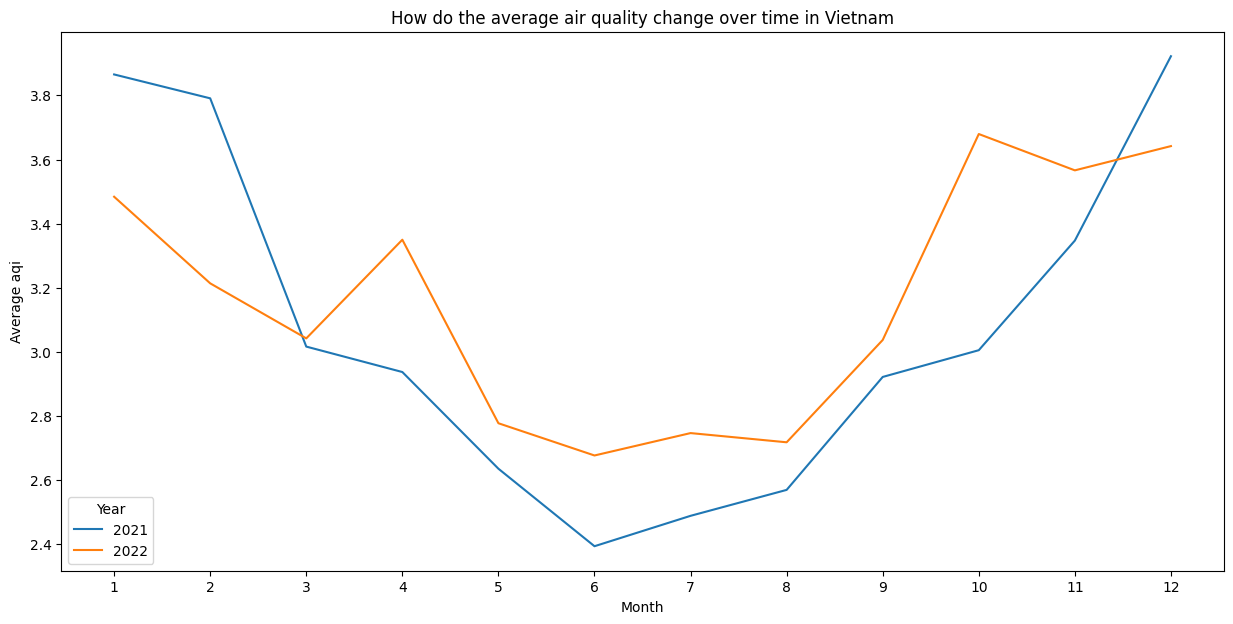

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.set_title("How do the average air quality change over time in Vietnam")

x = 'month'
y = 'aqi'

ax.plot(x, y, data=aqi_by_month[0], label=list(date_aqi_df.groups.keys())[0])
ax.plot(x, y, data=aqi_by_month[1], label=list(date_aqi_df.groups.keys())[1])

ax.set_xticks(aqi_by_month[0]['month'])

ax.set_xlabel('Month')
ax.set_ylabel('Average aqi')

ax.legend(title='Year')
plt.show()

> Note that the lower aqi indicates better air quality (see the data exploration section for more details).

__Observations and comparison:__

- _In general:_
   - The average AQI is slightly higher in 2022, indicating a relatively worse air quality compared to 2021.
   - However, the difference is insignificant, and both years fall within a similar range and relatively having the same trend.
   - The months with the freshest air in both 2021 and 2022 seem to hit their peak in the middle of the year. Probably because it's summertime – people are chilling more, not running around as much, which means less pollution and a smaller carbon footprint. On the flip side, the months where the air quality became worse seem to go the other way, probably when everyone's out and about more.

- _Trends:_
   - 2021: The AQI generally decreases from January to June and then starts to increase from July to December.
   - 2022: The AQI shows fluctuations throughout the year, with peaks in April, October, and November.
   - In 2021, there is a noticeable increase in AQI from July to December, while in 2022, fluctuations occur throughout the year, with peaks in different months.
   - Both years exhibit a general trend of worse air quality in the second half of the year.


__Possible Explanations:__
- _Climate Factors:_ Changes in weather patterns, temperature, and humidity can influence air quality. Variations in these factors between the two years might contribute to differences in AQI.

- _Human Activities:_ Economic activities, industrial processes, and transportation contribute significantly to air pollution. Changes in these factors, such as increased urbanization or industrial production, could impact air quality.

**Question 3:** Is there a connection between the percentage of poor households and pollution levels?

**Answering this question will:**  Understanding this connection is crucial for identifying environmental justice issues and formulating targeted policies to address the impact of pollution on vulnerable populations.
 
**How we answer this question**: We can analyze the correlation between the percentage of poor households and air pollution indicators (`aqi`) using a scatter plot.

__Preprocessing__

Given that `aqi` is a discrete numerical column, displaying all its values on a scatter plot might not be the most suitable approach. Instead, we'll compute the average values for each location and then compare how these averages vary based on the other features (`poor households`).

In [60]:
# calculate average aqi for each location
avg_data = df.groupby('location').mean()
avg_data.reset_index(inplace=True)
# get correlation coefficient
corcef = np.corrcoef(avg_data['Percentage of poor households'], avg_data['aqi'])[0, 1]
print("Correlation coefficient:", corcef)

Correlation coefficient: -0.312575411767258


__Visualize__

We will plot a scatter graph attached with a linear regression line to have a better insight about the relationship between `aqi` and `Percentage of poor households`.

In [61]:
# plt.suptitle(f'Relationship between poor households and air quality in each location in Vietnam')
# sns.regplot(avg_data, x='Percentage of poor households', y='aqi')
# plt.show()
fig = px.scatter(avg_data, x='Percentage of poor households', y='aqi', hover_name='location', trendline='ols')
fig.show()

**Observations and comments:**

- We can see that the relationship between `percentage of poor households` and `air quality index` is not very strong but still considerable. Looking at the scatter chart above, we can see that in general, the dots have a decreasing trend in `air quality` as `percentage of poor households` increases (with the correlation coefficient of __-0.31__).

- The negative relationship indicates that as the percentage of poor households increases, the air quality tends to decrease (moderately). This is explainable since a location with more poor households may sill depend on agriculture (as we said earlier, Vietnam is still an __uneven developed__ country), our agriculture is still quite backward (at least in that two years), so it doesn't have a negative impact on the environment as the industrial does. Therefore, the air quality is quite good in these areas (mainly in rural regions).

- The observations have revealed that while the development of agriculture may be backward, its positive aspect is that it does not have a bad impact on the environment. Conversely, areas with modern industrial development, like Hanoi and Ho Chi Minh City, suffer from severe climate pollution consequences. Therefore, it is crucial for us to address the issue of uneven development promptly. Implementing measures to balance agricultural and industrial development is essential, with a greater attention to environmental pollution concerns.

**Question 4:** How is the average concentration of pm10 distributed in provinces/cities in Vietnam?

**Answering this question will:** help us know the difference in average concentration of pm in different areas, thereby telling us what the cause is for high or low concentrations, or specifically geographical differences. From there, we will promote and propagate to residents to pay attention to protecting their health and protecting the environment.
 
**How we answer this question**: We will visualize the average concentration in different provinces/cities on Vietnam using a choropleth map.

__Preprocessing__

In [62]:
# Read the map of all provinces
geo = gpd.read_file('../data/vn-projected.json')

# Calculate the average AQI for each province/city
density = df.groupby(['location'])['pm10'].mean().reset_index(name='Avg.PM')

# Matching the province/ city name
geo['ten_tinh'] = geo['ten_tinh'].apply(lambda x: unidecode(x))
geo = geo.merge(density, left_on='ten_tinh', right_on='location').drop('location', axis=1)

__Visualize__

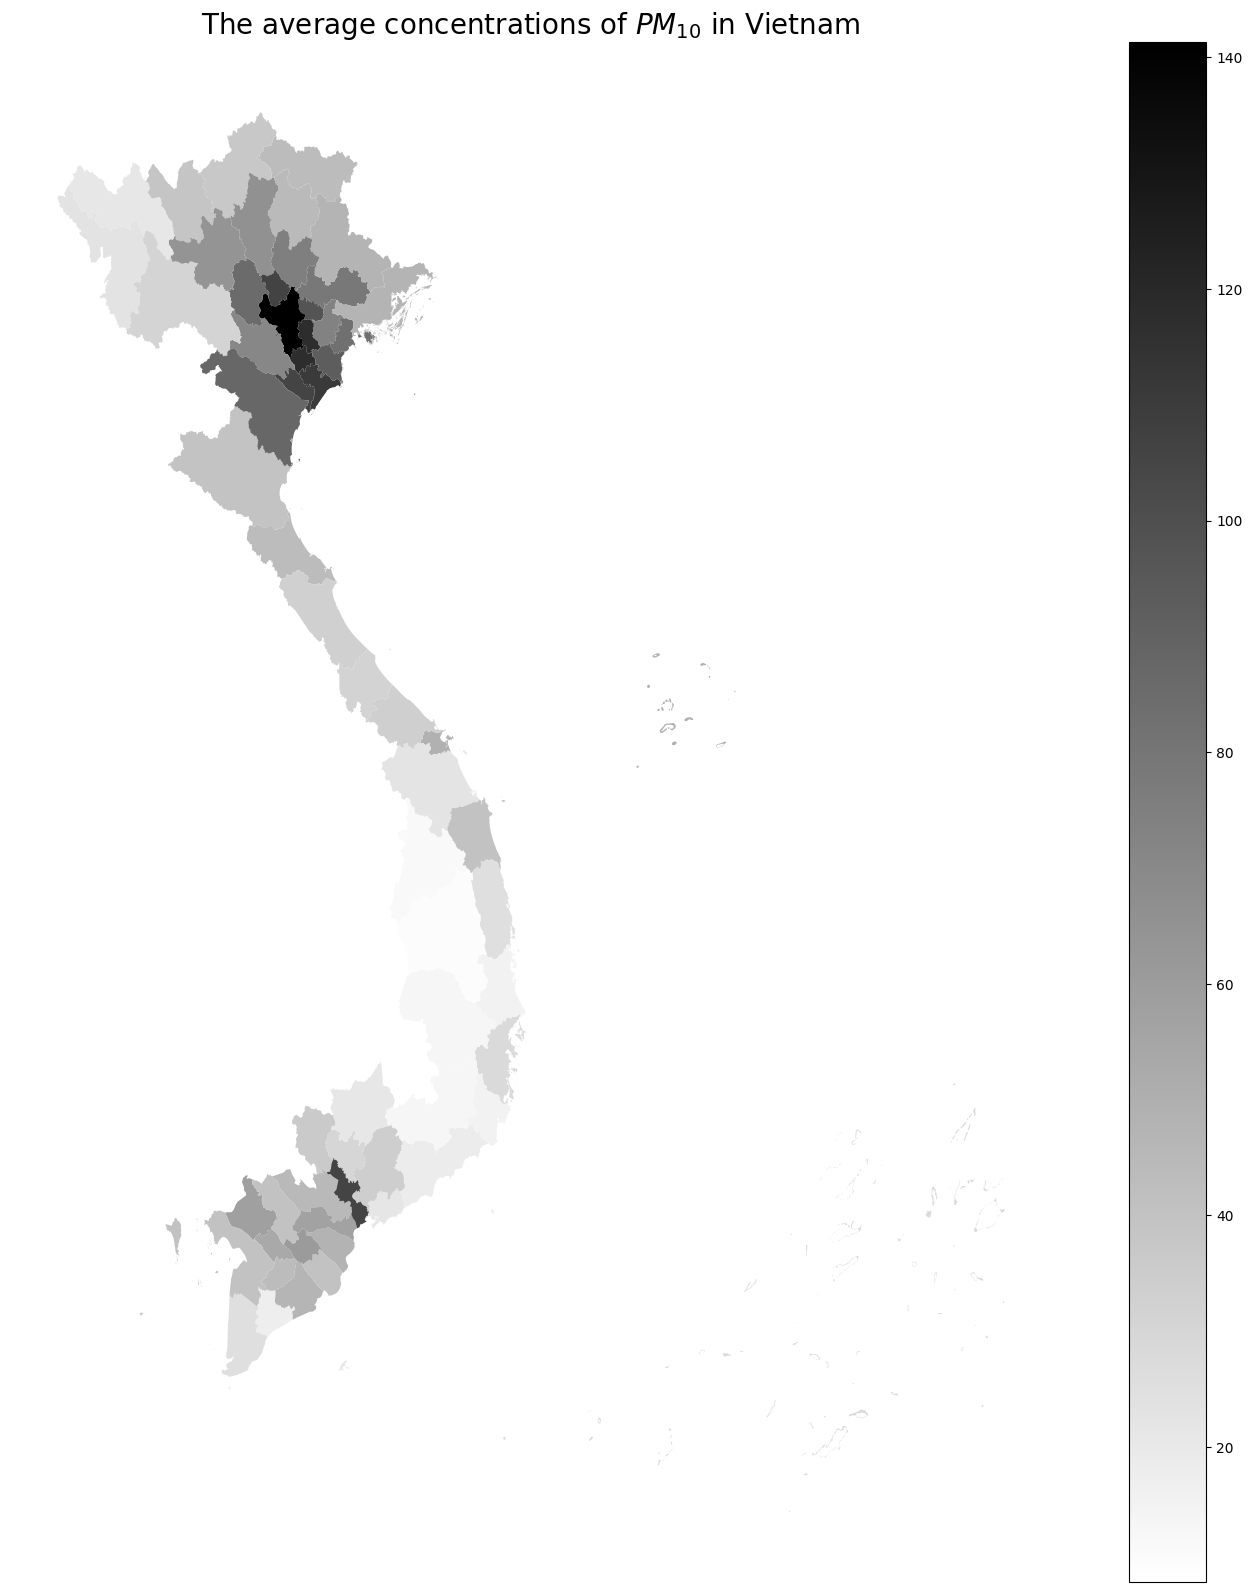

In [63]:
# Set up for heatmap
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.invert_yaxis()
plt.axis('off')
ax.set_title('The average concentrations of $PM_{10}$ in Vietnam', fontsize=20)

# Plot
geo.plot(ax=ax,column='Avg.PM', legend=True, cmap='binary')
plt.show()

**Observations and comments:**
-   $PM_{10}$ are dust particles that can be liquid or solid, suspended in the air.
-   From the above chart, we can figure out that the average concentration of $PM_{10}$ in the capital city of Hanoi and its neighboring provinces, as well as in Ho Chi Minh City and its surrounding provinces, is high.
-   Provinces and cities with average PM10 concentrations above $100 μg/m3$ include: `Hanoi`, `Ha Nam`, `Hung Yen`, `Nam Dinh`, `Vinh Phuc`, `Ho Chi Minh City`, and `Ninh Binh`. The reason the concentration of this substance is high is due to many factors:
    - Since 2021, after the relaxation of social distancing measures and the return to normal activities, the increasing traffic volume has led to traffic jam. This significantly contributes to the emission of dust particles, polluting the air.
    - In 2021 - 2022, construction activities have resumed and increased. The production, transportation, and use of construction materials generate substantial air pollutants and dust.
    - The above provinces and cities are mostly urban areas with industrial factories. Emissions from these factories have greatly impacted air quality.
- The mentioned provinces and cities all have average concentrations of $PM_{10}$ at levels that require public attention. That concentrations can significantly affect the health of the population. The data we have is from the years 2021-2022, following the COVID-19 period. Particularly, individuals who have recovered from COVID-19 need to pay extra attention to and protect their health.

**Question 5:**  How does the air quality vary across different human development features like HDI and total population?

**Answering this question will:** give us some information about the relationship between some population and development features across the provinces/cities in Vietnam and how those affect the air quality. 

**How we answer this question**: we will visualize bubble graph about the average total population and GRDP in 2 axes and the bubble indicates the average air quality of 64 provinces.

__Processing__

Same as above (question 3), we'll compute the average values for each location and then compare how these averages vary based on the other features.

In [64]:
# add a new feature: Total population = Total population in urban + Total population in rural
df5 = df.copy(deep=True)
df5['Total population'] = df5['Total population in urban'] + df5['Total population in rural']

# calculate avg values of all variables for each locations
avg_data = df5.groupby('location').mean()
avg_data.reset_index(inplace=True)

__Visualize__

In [65]:
fig = px.scatter(avg_data, x='Total population', y='HDI', size='aqi', 
                 size_max=20, color='aqi', hover_name='location')
fig.show()

**Observations and comments:**

- It is easy to notice that in most regions where `HDI (Human Development Index)` and `Total population` are high, the air quality is relatively poor. Most of these regions with high HDI and population are economic development centers in Vietnam (like `Ha Noi` and `Ho Chi Minh city`). Therefore, it is understandable that if these regions have worse air quality (higer `AQI`) as expected.

- Besides the outstanding regions considered as economic development centers in Vietnam, we also have other regions concentrated mainly in the range of HDI from 0.6 to 0.75 and low population. We can easily observe that the lower population and HDI, the less air pollution in that place since those are among the important factors that can negatively affect the environment. It's also noticeable that the AQI values of these regions will gradually increase as HDI or population increases.

- However, there are some regions that stand out, where despite having extremely high HDI with low population, their air quality is not excessively poor, such as Ba Ria - Vung Tau. Conversely, there is also a region with the lowest HDI and population, but the air quality is only at an average level in terms of air pollution, such as Ha Giang.

**Question 6:** What are the changes of the air quality for some provinces or cities having good/bad air quality?

**Answering this question will:** give us some insights about the efficiency of the government policies in term of protecting the environment. 
 

**How we answer this question**: we will use the bar graphs to visualize how the average air quality of some provinces/cities having good/bad quality change for 2 consecutive year.

__Preprocessing__

In [66]:
q6 = df.copy(deep=True)
q6['year'] = q6['date'].dt.year

#calculate mean of aqi with each location - year
df_q6 = q6.groupby(['location','year'])['aqi'].mean()
df_q6 = df_q6.reset_index()

area = []#list of cities/provinces
aqi_2021 = []#list of average aqi of each location in 2021
aqi_2022 = []#list of average aqi of each location in 2022

#fill value to 3 lists defined
for i in range(0,126,2):
    area.append(df_q6[df_q6.columns[0]][i])
    aqi_2021.append(df_q6[df_q6.columns[2]][i])
    aqi_2022.append(df_q6[df_q6.columns[2]][i+1])
    
aqi_2021_dictionary = dict(zip(area,aqi_2021))#dictionary with keys are location and values area average aqi in 2021
aqi_2022_dictionary = dict(zip(area,aqi_2022))#dictionary with keys are location and values area average aqi in 2022

#dictionary with descending aqi in 2021 and 2022
sorted_aqi_2021_dictionary = dict(sorted(aqi_2021_dictionary.items(), key=lambda item: item[1], reverse=True))
sorted_aqi_2022_dictionary = dict(sorted(aqi_2022_dictionary.items(), key=lambda item: item[1],reverse=True))

#convert sorted aqi dictionary to dataframe for easily visualizing
aqi_2021_df = pd.DataFrame(list(sorted_aqi_2021_dictionary.items()), columns = ['Area', 'AQI value'])
aqi_2022_df = pd.DataFrame(list(sorted_aqi_2022_dictionary.items()), columns = ['Area', 'AQI value'])

__Visualize__

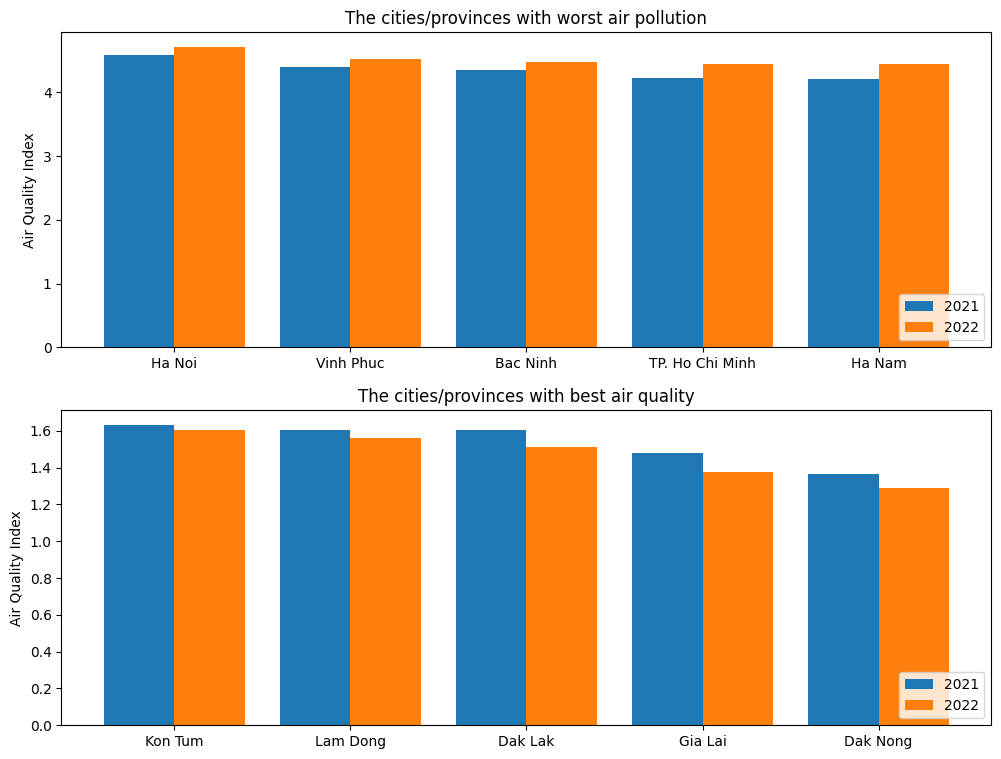

In [67]:
# create two axes
fig, axes = plt.subplots(2, 1, figsize=(12, 9))

#Visualizing the Top 5 Worst Locations for Air Quality Index (AQI).
ax = axes[0]
ax.set_title('The cities/provinces with worst air pollution')
X_axis = np.arange(5) 
filtered_aqi_2022_df = aqi_2022_df[aqi_2022_df['Area'].isin(aqi_2021_df.head()['Area'])]
ax.bar(X_axis - 0.2, aqi_2021_df.head()['AQI value'],0.4,label='2021')
ax.bar(X_axis + 0.2, filtered_aqi_2022_df['AQI value'],0.4,label='2022')
ax.set_xticks(X_axis,aqi_2021_df.head()['Area'])
ax.set_ylabel('Air Quality Index')
ax.legend(loc=4)

#Visualizing the Top 5 Best Locations for Air Quality Index (AQI).
ax = axes[1]
ax.set_title('The cities/provinces with best air quality')
filtered_aqi_2022_df = aqi_2022_df[aqi_2022_df['Area'].isin(aqi_2021_df.tail()['Area'])]
ax.bar(X_axis - 0.2, aqi_2021_df.tail()['AQI value'],0.4,label='2021')
ax.bar(X_axis + 0.2, filtered_aqi_2022_df['AQI value'],0.4,label='2022')
ax.set_xticks(X_axis,aqi_2021_df.tail()['Area'])
ax.set_ylabel('Air Quality Index')
ax.legend(loc=4)

plt.show()

**Observations and comments:**

- We can observe the worst cities/provinces in terms of air pollution, focusing on Northern Vietnam. The reasons for this may be that these provinces have high population density. Additionally, they are located in the delta region and are all economically developed areas. 

- Conversely, we can easily notice that areas with the best air quality are concentrated in the mountainous provinces, especially in the Central Highlands. This is because these provinces have lower population density, and the overall economy is not as strongly developed compared to other regions in the country.

- It's worth considering that we can see places with a developed economy, coupled with poor air quality, seem to worsen over time, while conversely, areas with good air quality tend to improve. The hustle of economic growth and industry in developed areas leads to more pollution, worsens air quality. On the flip side, places with good air seem to be cleaning up, also they tend to focus on developing tourism, so it's understandable that environmental concerns are getting more attention. To tackle this, we need stricter green rules and a balance between growth and a clean environment.

**Question 7:** Does rural or urban areas in Vietnam have better air quality?

**Answering this question will:** benefit public health, inform government policies and urban planning, contribute to environmental conservation, promote rural tourism...

**How we answer this question**: by exploring whether areas with a higher ratio of urban population experience better or worse air quality.

__Preprocessing__

First we will calculate the `urban population ratio` by the value of (`total urban population` / `total population`), then we will group the data by each location (city/province) and then take the mean values of each variable.

In [68]:
df7 = df.copy(deep=True)
# calculate urban population ratio
df7['Total population'] = df7['Total population in urban'] + df7['Total population in rural']
df7['Urban population ratio'] = df7['Total population in urban'] / (df7['Total population']) * 100

# group by location
avg_data = df7.groupby('location').mean()
avg_data.reset_index(inplace=True)

# get correlation coefficient
corcef = np.corrcoef(avg_data['Urban population ratio'], avg_data['aqi'])[0, 1]
print("Correlation coefficient:", corcef)

Correlation coefficient: 0.04425764812869145


__Visualize__

We will visualize this using a scatter plot with a linear regression line to see the relationshiop between two features.

In [69]:
fig = px.scatter(avg_data, x='Urban population ratio', y='aqi', trendline='ols', hover_name='location')
fig.show()

__Observations and comments__

- By looking at the plot above, we can see that the relationship between `urban population ratio` and the `air quality index` is very weak (with a correlation coefficient of approximately 0.044). In other words, there is little association between the size of the urban population and the level of air pollution in Vietnam as much as we expected.

__Possible explanations:__
- _Industrial Activities:_ Industrial zones are scattered across both urban and rural areas, the impact on air quality may not be solely determined by the urban population.

- _Traffic Distribution:_ The concentration of traffic and vehicle emissions may not be strictly tied to urban areas.

- _Geographical Features:_ The country's geographical features, such as wind patterns and topography, could influence the dispersion of pollutants.

- Understanding these is crucial for a comprehensive analysis of air quality dynamics in the country.